In [2]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
import mpl_scatter_density
from sklearn.mixture import GaussianMixture

In [3]:
data = pd.read_csv('Catalogues/NGC2539_6.csv')
data

,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,120.750245,-12.176855,3036167945540297216,0.0871,0.0647,0.8691,0.1415,3.414,-3.204,0.141,...,1.031,18.310925,19.155960,17.442314,1.713646,NaN,-31.849131,120.750260,-12.176860,0.893827
1,120.748502,-12.169048,3036168014259997824,0.3567,0.2588,0.8023,0.6067,2.525,-2.522,0.528,...,1.033,20.078209,20.758951,19.249168,1.509783,NaN,-31.841959,120.748514,-12.169048,0.798188
2,120.774801,-12.163916,3036173851116718848,0.2784,0.2068,0.7845,0.4647,2.086,-1.933,0.416,...,1.023,19.835163,20.270933,19.323252,0.947681,NaN,-31.830819,120.774810,-12.163912,0.797336
3,120.830799,-12.110140,3036174508246849152,0.3851,0.2784,0.8398,0.7343,4.241,-4.052,0.606,...,1.015,20.334070,21.634747,19.380322,2.254425,NaN,-31.765490,120.830818,-12.110146,0.819051
4,120.865892,-12.053844,3036176260594179968,0.3226,0.2353,0.8302,0.5866,1.703,-1.330,0.447,...,1.032,20.021528,20.645718,19.416590,1.229128,NaN,-31.702607,120.865898,-12.053849,0.845315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5446,122.950038,-10.875279,5728377137430686464,0.5356,0.4344,0.7849,0.8926,1.754,-1.750,0.865,...,1.005,20.386703,20.888035,19.657074,1.230961,NaN,-30.059608,122.950046,-10.875278,0.809587
5447,122.538909,-10.915045,5728385456786179584,0.1651,0.1537,0.7426,0.2426,1.298,-0.960,0.252,...,1.004,19.035507,19.406060,18.552877,0.853182,NaN,-30.198554,122.538913,-10.915049,0.757974
5448,122.532428,-10.872480,5728386143977005440,0.6301,0.5862,0.8346,0.9974,1.789,-1.451,1.059,...,1.034,20.602892,20.914776,20.015713,0.899063,NaN,-30.158888,122.532434,-10.872476,0.829929
5449,122.572126,-10.871759,5728386178338960640,0.1460,0.1316,0.7025,0.2213,1.382,-1.351,0.215,...,1.070,18.670115,18.940420,18.207432,0.732988,NaN,-30.148539,122.572132,-10.871757,0.725627


In [4]:
df1 = pd.read_csv('Catalogues/NGC2539_norm3_7.csv')
df1

,RAJ2000,DEJ2000,pmRA,pmDE,BP-RP,Plx_corr
0,-1.788664,0.701279,-1.107999,1.284502,1.063224,1.955411
1,-1.790419,0.709317,-0.437917,0.228513,0.573657,0.822740
2,-1.763994,0.714603,0.140791,-0.671919,-0.776204,0.812650
3,-1.707712,0.769933,-1.941181,1.357294,2.361879,1.069825
4,-1.672460,0.827868,0.733253,1.169829,-0.100322,1.380874
...,...,...,...,...,...,...
5446,0.421897,2.040716,0.320593,-0.014793,-0.095921,0.957741
5447,0.008750,1.999789,1.096788,0.981366,-1.003139,0.346478
5448,0.002240,2.043600,0.614368,-0.934171,-0.892958,1.198655
5449,0.042132,2.044339,0.712620,-0.178326,-1.291779,-0.036614


In [5]:
#df1 = df1.to_pandas()
df1 = df1.fillna(0).values 

In [6]:
df1 = pd.DataFrame(df1)

In [7]:
df1= df1.rename(columns={0: 'RAJ2000', 1: 'DEJ2000', 2: 'pmRA', 3 : 'pmDE', 4: 'BP-RP',
                         5: 'Plx_corr'})
df1

,RAJ2000,DEJ2000,pmRA,pmDE,BP-RP,Plx_corr
0,-1.788664,0.701279,-1.107999,1.284502,1.063224,1.955411
1,-1.790419,0.709317,-0.437917,0.228513,0.573657,0.822740
2,-1.763994,0.714603,0.140791,-0.671919,-0.776204,0.812650
3,-1.707712,0.769933,-1.941181,1.357294,2.361879,1.069825
4,-1.672460,0.827868,0.733253,1.169829,-0.100322,1.380874
...,...,...,...,...,...,...
5446,0.421897,2.040716,0.320593,-0.014793,-0.095921,0.957741
5447,0.008750,1.999789,1.096788,0.981366,-1.003139,0.346478
5448,0.002240,2.043600,0.614368,-0.934171,-0.892958,1.198655
5449,0.042132,2.044339,0.712620,-0.178326,-1.291779,-0.036614


In [12]:
gmm = GaussianMixture(n_components = 3, tol=1e-7, max_iter=1000, random_state=60).fit(df1)

In [13]:
cluster = gmm.predict(df1)
df1['cluster'] = cluster

In [14]:
df1.cluster.value_counts()

cluster
2    3087
0    1896
1     468
Name: count, dtype: int64

In [15]:
df2 = data.assign(cluster=df1["cluster"])

In [22]:
a1 = df2[df2["cluster"]==0]
a2 = df2[df2["cluster"]==1]
a3 = df2[df2["cluster"]==2]

/opt/anaconda3/envs/analysis-env/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0, 0.5, 'Gmag (mag)')

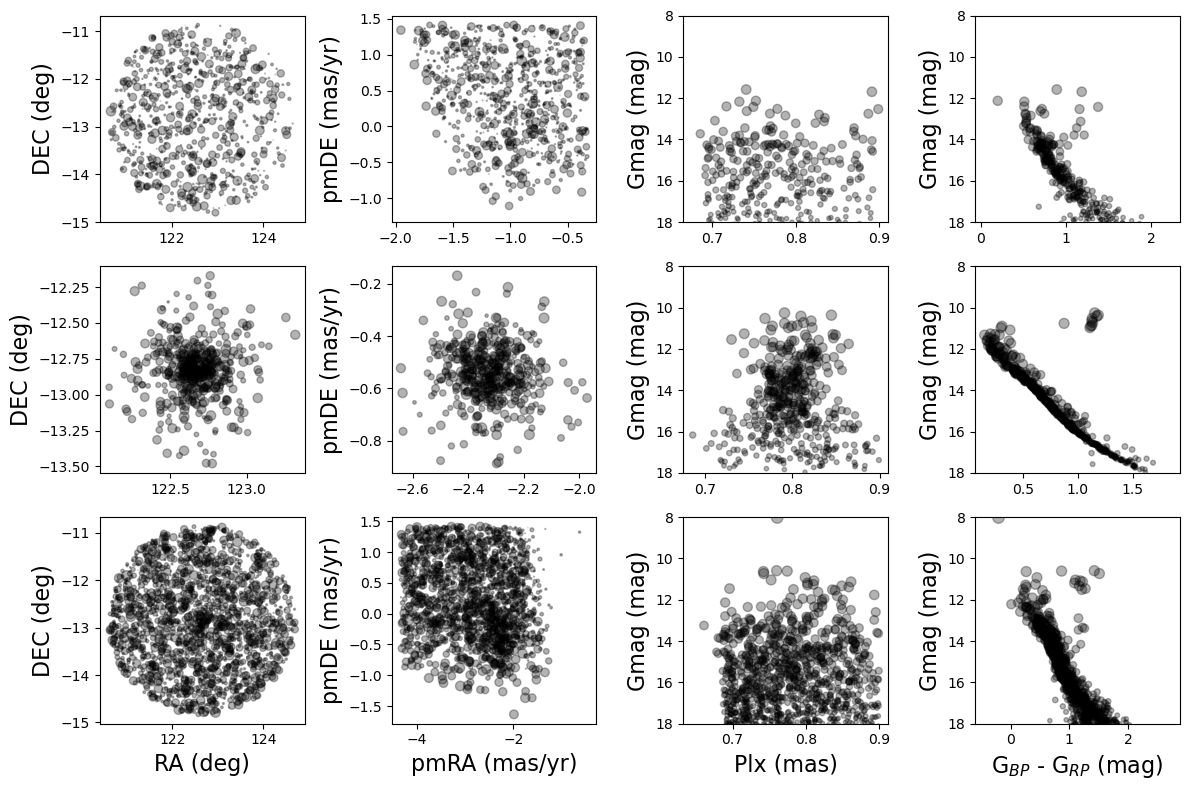

In [17]:
fig,ax = plt.subplots(3,4, figsize=(12,8),tight_layout=True)

ax[0,0].scatter(a1.RAJ2000, a1.DEJ2000, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,0].set_ylabel("DEC (deg)",fontsize=16)
ax[0,1].scatter(a1.pmRA, a1.pmDE, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[0,2].scatter(a1.Plx_corr, a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,2].set_ylim(18,8)
ax[0,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[0,3].scatter(a1["BP-RP"], a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,3].set_ylim(18,8)
ax[0,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[1,0].scatter(a2.RAJ2000, a2.DEJ2000, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,0].set_ylabel("DEC (deg)",fontsize=16)
ax[1,1].scatter(a2.pmRA, a2.pmDE, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[1,2].scatter(a2.Plx_corr, a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,2].set_ylim(18,8)
ax[1,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[1,3].scatter(a2["BP-RP"], a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,3].set_ylim(18,8)
ax[1,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[2,0].scatter(a3.RAJ2000, a3.DEJ2000, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,0].set_xlabel("RA (deg)",fontsize=16)
ax[2,0].set_ylabel("DEC (deg)",fontsize=16)
ax[2,1].scatter(a3.pmRA, a3.pmDE, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[2,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[2,2].scatter(a3.Plx_corr, a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,2].set_ylim(18,8)
ax[2,2].set_xlabel("Plx (mas)",fontsize=16)
ax[2,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[2,3].scatter(a3["BP-RP"], a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,3].set_ylim(18,8)
ax[2,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[2,3].set_ylabel("Gmag (mag)",fontsize=16)


In [25]:
#a1 = a1.drop(columns=["cluster"])

In [39]:
#a1.to_csv('Catalogues/NGC2539_6.csv', index=False) 

In [23]:
cluster1 = a2
cluster2 = a3

In [24]:
cluster1 = cluster1.drop(columns=["cluster"])
cluster2 = cluster2.drop(columns=["cluster"])

In [25]:
#cluster1.to_csv('Catalogues/NGC2539_8_Pop1.csv', index=False) 
#cluster2.to_csv('Catalogues/NGC2539_9_Pop2.csv', index=False) 